# Series de tiempo
Un concepto fundamental en economía, econometría y estadística es el de las series de tiempo, las cuales se definen como un conjunto de observaciones de un fenómeno ordenados en el tiempo, donde este ultimo puede ser periódico o no, lo cual estará dado por la posibilidad o interés de tomar la medida.

En este ramo, se estudiarán los conceptos básicos del manejo de series de tiempo en la primera parte del ramo, para luego estudiar algunos modelos útiles.
En términos de manejo de las series veremos:

+ Dataframes y Series en pandas
+ Índices
+ Fechas
+ formato ISO 8601
+ slices
+ Selección de datetimes parcial
+ Llenado de valores perdidos (backward fill, forward fill, interpolación
+ Medias móviles
+ Visualización de series de tiempo

In [1]:
# Se importan las librerías principales
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Se lee el 
aapl = pd.read_csv("AAPL.csv")
print(aapl.head(2))

         Date        Open        High        Low       Close  Adj Close  \
0  2014-09-29  100.589996  100.690002  98.040001   99.620003  93.514290   
1  2014-10-06   99.949997  102.379997  98.309998  100.730003  94.556244   

      Volume  
0  142718700  
1  280258200  


## Índices y fechas
En el caso de querer trabajar con series de tiempo, es necesario saber como leer los archivos de forma apropiada, esto debido a que resulta muy útil trabajar con índices y no siempre pandas trabaja con ellos.
Por ello, acá se muestran tres formas de leer un mismo archivo, y con df.dtypes es posible observar la diferencia que se genera.

+ Leer el dataframe sin especificar nada, cada columna es una variable (df1). Date es por defecto tipo object
+ Indicando parse_dates, que indica claramente cual es la columna que tiene la componente de tiempo (df2). Date es de tipo datetime64[ns] (formato general para fechas en Python)
+ Indicado lo anterior, ademas de definir la fecha como índice (df23). Se observa que ya no aparece la fecha con .dtypes, debido a que ahora es un índice. Esta es la forma de leer archivos de series de tiempo.

In [48]:
filename = "AAPL.csv"
df1 = pd.read_csv(filename)
print(df1.head())
print(df1.dtypes)

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [15]:
df2 = pd.read_csv(filename, parse_dates=['Date'])
print(df2.head())
print(df2.dtypes)

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1 2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2 2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3 2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4 2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [16]:
df3 = pd.read_csv(filename, index_col='Date', parse_dates=True)
print(df3.head())
print(df3.dtypes)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

               Volume  
Date                   
2014-09-29  142718700  
2014-10-06  280258200  
2014-10-13  358539800  
2014-10-20  358532900  
2014-10-27  220230600  
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


En otros casos, uno quiere construir un dataframe para análisis de series de tiempo a partir de datos que uno ha procesado, en ese caso, la función .to_datetime() permite obtener lo visto anteriormente.
Para utilizar esta función es necesario conocer el formato a utilizar, y asumiremos que tenemos las series de Precio de apertura y fechas asociadas en dos listas de un proceso anterior.

In [63]:
# Se define el formato, se supone que lo conocemos
formato_fecha = '%Y-%m-%d'

# Esta parte es solo para ejemplificar
lista_fechas = df1['Date'].tolist()
lista_apertura = df1['Open'].tolist()

# Se pasa la lista de fechas al formato datetime
fechas_datetimes = pd.to_datetime(lista_fechas, format = formato_fecha) 
print(fechas_datetimes)

# Se genera la serie de tiempo
serie_temporal = pd.Series(lista_apertura, index = fechas_datetimes)
serie_temporal.head()

DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05', '2018-03-12', '2018-03-19',
               '2018-03-26', '2018-03-29'],
              dtype='datetime64[ns]', length=184, freq=None)


2014-09-29    100.589996
2014-10-06     99.949997
2014-10-13    101.330002
2014-10-20     98.320000
2014-10-27    104.849998
dtype: float64

Con lo anterior es posible construir una Serie en pandas, que se puede entender como una columna de un DataFrame con un index, de hecho, todas las funciones para sacar estadísticas que vimos para dataframes aplican para series (describe, count, max, quantile, etc), incluso los gráficos.

count    184.000000
mean     127.040245
std       24.314449
min       92.389999
25%      108.882500
50%      118.895000
75%      144.935005
max      180.289993
dtype: float64
184
108.88249950000001


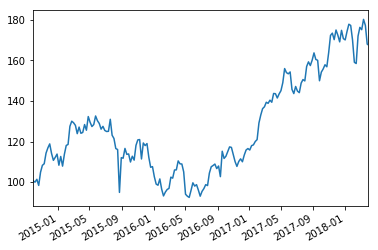

In [62]:
# Ejemplos de funciones
print(serie_temporal.describe())
print(serie_temporal.count())
print(serie_temporal.quantile(0.25))

# Gráfico simple
serie_temporal.plot()
plt.show()

## Leer y cortar períodos
Las series de pandas poseen lo que se conoce como indexado parcial, es decir, que uno puede entregar solo una porción del datetime y pandas entregará el periodo especificado. A continuación se especificarán los siguientes períodos y se calcularán sus estadísticas.

+ Datos solo de 2016
+ 2016 a 2018
+ Solo del 4 de febrero de 2016
+ Del 4 de febrero de 2016 al 4 de febrero de 2018
+ Solo de marzo de 2016
+ De marzo a agosto de 2017

In [85]:
# Datos solo de 2016
s1 = serie_temporal.loc['2016']
print(s1.describe())

# 2016 a 2018
s2 = serie_temporal.loc['2016':'2018']
print(s2.describe())

# Solo del 4 de enero de 2016
s3 = serie_temporal.loc['2016-01-04']
print(s3)

# Del 4 de febrero de 2016 al 4 de febrero de 2018
s4 = serie_temporal.loc['2016-02-04':'2018-02-04']
print(s4.describe())

# Solo de marzo de 2016
s5 = serie_temporal.loc['2016-03']
print(s5.describe())

# De marzo a agosto de 2017
s6 = serie_temporal.loc['2017-03':'2017-08']
print(s6.describe())

count     52.000000
mean     104.271154
std        7.505763
min       92.389999
25%       97.707499
50%      104.705002
75%      110.090002
max      117.330002
dtype: float64
count    118.000000
mean     132.271314
std       28.298815
min       92.389999
25%      106.845001
50%      134.654999
75%      157.389999
max      180.289993
dtype: float64
102.610001
count    104.000000
mean     130.532116
std       26.869492
min       92.389999
25%      107.662498
50%      125.030003
75%      154.279995
max      177.899994
dtype: float64
count      4.000000
mean     104.057501
std        2.211475
min      101.910004
25%      102.270000
50%      104.159999
75%      105.947500
max      106.000000
dtype: float64
count     26.000000
mean     148.118462
std        6.565811
min      138.850006
25%      143.615005
50%      146.455001
75%      153.854999
max      160.139999
dtype: float64
